In [6]:
#plot density in equilibration
import pandas as pd
import matplotlib.pyplot as plt
import glob
def plot_density_equil(confid):
    plt.figure(figsize=(10, 6))
    filenames = glob.glob(f'trajectories/equil_test_10random_10diverse/equilibration_{confid}*.dat')
    #read in the dfs, and combine them vertically, if more then one
    dfs = [pd.read_csv(file) for file in filenames]
    df = pd.concat(dfs)
    df= df.sort_values(by='#"Step"', ascending=False)
    df = df.drop_duplicates(subset=['#"Step"'], keep='first')
    plt.plot(df['#"Step"'], df['Density (g/mL)'], marker='o', linestyle='-')
    plt.xlabel('Step')
    plt.ylabel('Density (g/mL)')
    plt.title(f'Density equilibration {confid}')
    plt.grid(True)
    plt.legend()
    plt.show()
    return df
# df_2397 = plot_density_equil(2397)
confids_to_test = [2397, 1906, 2004, 15865, 1335, 2606, 1498, 3516, 16764, 16848, 3178, 16216, 1408, 1308, 3397, 2955, 3393, 3827, 15900, 16259]
# for confid in confids_to_test:
#     try:
#         plot_density_equil(confid)
#     except ValueError:
#         print(f'No data for {confid}')
#         continue

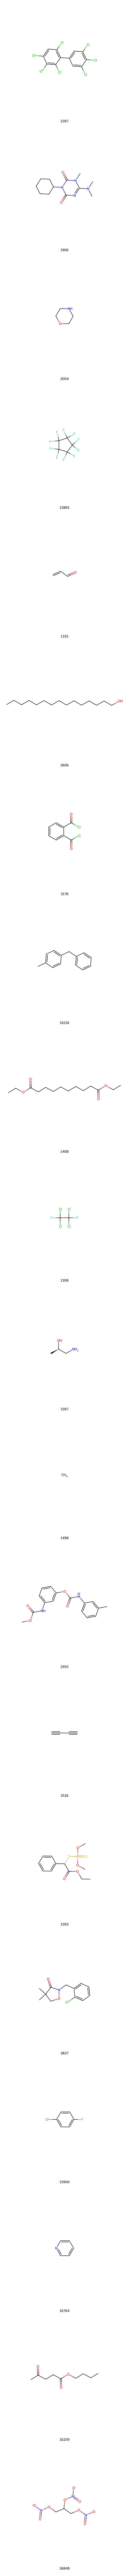

In [3]:
#get smiles with these confids from the df
from rdkit import Chem
import pandas as pd
from rdkit.Chem import Draw
confids_to_test = [2397, 1906, 2004, 15865, 1335, 2606, 1498, 3516, 16764, 16848, 3178, 16216, 1408, 1308, 3397, 2955, 3393, 3827, 15900, 16259]

df = pd.read_csv('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/data_curation/cs_mdfps_schema_experimental_data.csv')
smiles = df[df['conf_id'].isin(confids_to_test)]['smiles']
confids = df[df['conf_id'].isin(confids_to_test)]['conf_id']
moles = [Chem.MolFromSmiles(x) for x in smiles]
Draw.MolsToGridImage(moles,molsPerRow=1,subImgSize=(600,600),legends=[str(x) for x in confids])

C=CC=O


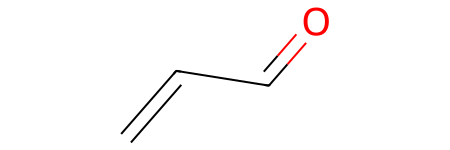

In [14]:
#get molblock for confid 1335
molblock = df[df['conf_id']==1335]['molblock'].tolist()
mol = Chem.MolFromMolBlock(molblock[0])
print(Chem.MolToSmiles(mol))
mol

In [15]:
#get num rotatable bonds
from rdkit.Chem import rdMolDescriptors
rdMolDescriptors.CalcNumRotatableBonds(mol)

1

In [13]:
from rdkit import Chem
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions
isomers = tuple(EnumerateStereoisomers(mol))
for smi in sorted(Chem.MolToSmiles(x, isomericSmiles=True) for x in isomers):
    print(smi)

C=CC=O


In [ ]:
shaky_densities_confids = [1335,3516,16764,1308]
halogen_confids = [2397,15865,3178,1308]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


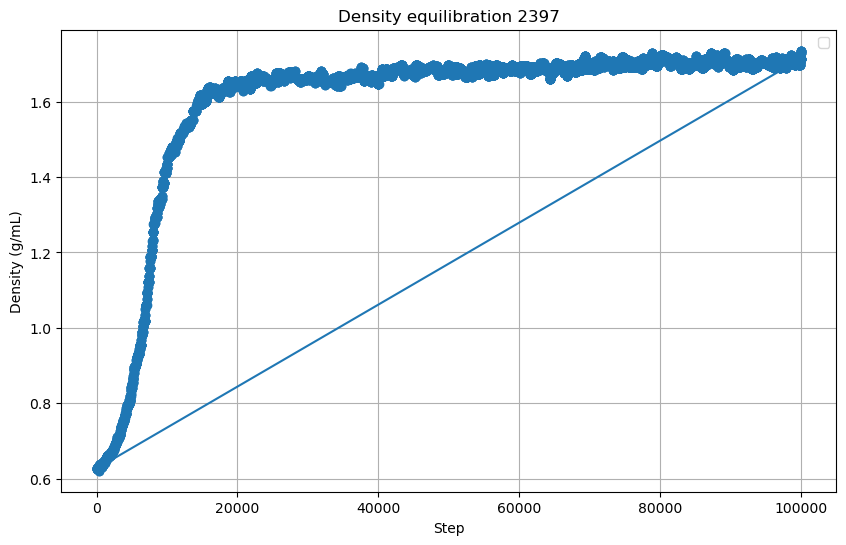

KeyError: '"#Step"'

In [1]:
#look at molecules from the smaller sets from shuzhe, can they be used as external test set?
import pandas as pd
fragrance_DB = pd.read_csv('/localhome/cschiebroek/ShuZe/vp/data cleaning/cleaned_vp_fragrancedb.tsv', sep='\t')
lts = pd.read_csv('/localhome/cschiebroek/ShuZe/vp/data cleaning/cleaned_vp_lts.tsv', sep='\t')
good_scent_company = pd.read_csv('/localhome/cschiebroek/ShuZe/vp/data cleaning/cleaned_vp_website.tsv', sep='\t')
#combine. they all have the same columns, expect for the last one
all_molecules = pd.concat([fragrance_DB, lts, good_scent_company])
#has now columns FRAGRANCE VP	LTS VP	WEBSITE VP, with value either True or NaN. make this into one column, called 'source', which is either 'fragrance', 'lts' or 'website'
all_molecules['source'] = all_molecules.apply(lambda row: 'fragrance' if row['FRAGRANCE VP'] else ('lts' if row['LTS VP'] else ('website' if row['WEBSITE VP'] else 'unknown')), axis=1)
#remove the original columns
all_molecules = all_molecules.drop(columns=['FRAGRANCE VP', 'LTS VP', 'WEBSITE VP'])
#remove duplicates 
all_molecules_298 = all_molecules[all_molecules['Temperature'] == 298.15]
print(len(all_molecules_298['SMILES'].unique()))
#about 192 unique molecules, not bad. 


198


In [2]:
from rdkit import Chem
mols_combined = [Chem.MolFromSmiles(smi) for smi in all_molecules_298['SMILES'].unique()]

In [3]:
#now check how many of these are already in the training set. first normalize, then query
from rdkit.Chem.MolStandardize import rdMolStandardize
mols_combined_standardized = [rdMolStandardize.ChargeParent(mol) for mol in mols_combined]


[13:23:31] Initializing MetalDisconnector
[13:23:31] Running MetalDisconnector
[13:23:31] Initializing Normalizer
[13:23:31] Running Normalizer
[13:23:31] Running LargestFragmentChooser
[13:23:31] Fragment: O=C(OCc1ccccc1)c1ccccc1
[13:23:31] New largest fragment: O=C(OCc1ccccc1)c1ccccc1 (28)
[13:23:31] Running Uncharger
[13:23:31] Initializing MetalDisconnector
[13:23:31] Running MetalDisconnector
[13:23:31] Initializing Normalizer
[13:23:31] Running Normalizer
[13:23:31] Initializing MetalDisconnector
[13:23:31] Running MetalDisconnector
[13:23:31] Initializing Normalizer
[13:23:31] Running Normalizer
[13:23:31] Running LargestFragmentChooser
[13:23:31] Fragment: C1CCSC1
[13:23:31] New largest fragment: C1CCSC1 (13)
[13:23:31] Running Uncharger
[13:23:31] Initializing MetalDisconnector
[13:23:31] Running MetalDisconnector
[13:23:31] Initializing Normalizer
[13:23:31] Running Normalizer
[13:23:31] Initializing MetalDisconnector
[13:23:31] Running MetalDisconnector
[13:23:31] Initializi

In [4]:
#add the standardized SMILES to the dataframe
all_molecules_298['SMILES_standardized'] = all_molecules_298['SMILES'].apply(lambda smi: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles(smi))))

[13:23:31] Initializing MetalDisconnector
[13:23:31] Running MetalDisconnector
[13:23:31] Initializing Normalizer
[13:23:31] Running Normalizer
[13:23:31] Running LargestFragmentChooser
[13:23:31] Fragment: O=C(OCc1ccccc1)c1ccccc1
[13:23:31] New largest fragment: O=C(OCc1ccccc1)c1ccccc1 (28)
[13:23:31] Running Uncharger
[13:23:31] Initializing MetalDisconnector
[13:23:31] Running MetalDisconnector
[13:23:31] Initializing Normalizer
[13:23:31] Running Normalizer
[13:23:31] Initializing MetalDisconnector
[13:23:31] Running MetalDisconnector
[13:23:31] Initializing Normalizer
[13:23:31] Running Normalizer
[13:23:31] Running LargestFragmentChooser
[13:23:31] Fragment: C1CCSC1
[13:23:31] New largest fragment: C1CCSC1 (13)
[13:23:31] Running Uncharger
[13:23:31] Initializing MetalDisconnector
[13:23:31] Running MetalDisconnector
[13:23:31] Initializing Normalizer
[13:23:31] Running Normalizer
[13:23:31] Initializing MetalDisconnector
[13:23:31] Running MetalDisconnector
[13:23:31] Initializi

In [5]:
import lwreg
from lwreg import standardization_lib
from lwreg import utils
#using our standard settings for our databse cs_mdfps
config = lwreg.utils.defaultConfig()
config['dbtype'] = 'postgresql'
config['dbname'] = 'cs_mdfps'
config['host'] = 'scotland'
config['user'] = 'cschiebroek'
config['password'] = '' 
config['standardization'] = standardization_lib.RemoveHs()
config['registerConformers'] = True

In [6]:
#query all the molecules
molregnos_to_add = []
for mol in all_molecules_298['SMILES_standardized']:
    query = lwreg.query(config = config, smiles=mol)
    if len(query) == 0:
        molregnos_to_add.extend([None])
    else:
        molregnos_to_add.extend(query)
all_molecules_298['molregno'] = molregnos_to_add

/tmp/ipykernel_3154940/2715206366.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_molecules_298['molregno'] = molregnos_to_add


In [7]:
all_molecules_298
#add column vp_log10_pa, gotten from Vapour Pressure (log10 kPa)
#first Vapour Pressure (kPa) from Vapour Pressure (log10 kPa)
all_molecules_298['vp_kPa'] = 10**all_molecules_298['Vapour Pressure (log10 kPa)']
#then kpa to pa
all_molecules_298['vp_pa'] = all_molecules_298['vp_kPa']*1000
#then log10
import math
all_molecules_298['vp_log10_pa'] = all_molecules_298['vp_pa'].apply(lambda x: math.log10(x))

/tmp/ipykernel_3154940/815339910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_molecules_298['vp_kPa'] = 10**all_molecules_298['Vapour Pressure (log10 kPa)']
/tmp/ipykernel_3154940/815339910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_molecules_298['vp_pa'] = all_molecules_298['vp_kPa']*1000
/tmp/ipykernel_3154940/815339910.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [8]:
all_molecules_298

,hash_code,SMILES,Temperature,Vapour Pressure (log10 kPa),source,SMILES_standardized,molregno,vp_kPa,vp_pa,vp_log10_pa
0,01700605f281e9c94a74c1f9fce89f20,[O]=[C](-[O]-[CH2]-[c]1:[cH]:[cH]:[cH]:[cH]:[c...,298.15,-4.524850,fragrance,O=C(OCc1ccccc1)c1ccccc1,21.0,0.000030,0.029864,-1.524850
2,04efd594a6c81968f4fd8eb05fd69f7f,[CH2]1-[CH2]-[CH2]-[S]-[CH2]-1,298.15,0.380211,fragrance,C1CCSC1,16772.0,2.400000,2399.999983,3.380211
3,0539b760ea727471e54711c4ac3b2c88,[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...,298.15,-3.701912,fragrance,CCCCCCCCCCCCCCCC,17133.0,0.000199,0.198650,-0.701912
5,08ab7a61e896dc23ab0a78554241f8ea,[CH3]-[CH2]-[CH2]-[CH2]-[OH],298.15,-0.030000,fragrance,CCCCO,16864.0,0.933254,933.254000,2.970000
7,0adc8a633eb3d414424603ba6965b6af,[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...,298.15,-4.833705,fragrance,CCCCCCCCCCCCCCO,125.0,0.000015,0.014665,-1.833705
...,...,...,...,...,...,...,...,...,...,...
179,f6184df0e14450c66c298e5cb45c428b,[CH3]-[c]1:[cH]:[cH]:[c](-[OH]):[cH]:[c]:1-[CH3],298.15,-2.323648,fragrance,Cc1ccc(O)cc1C,4110.0,0.004746,4.746263,0.676352
181,f720fcda3f9edbf0eb0eb7eacc4066c3,[CH3]-[C](=[O])-[CH]=[C](-[CH3])-[CH3],298.15,0.039245,fragrance,CC(=O)C=C(C)C,4124.0,1.094574,1094.573620,3.039245
183,fa6e16dee9513a716bf17a0bb4d86c63,[CH3]-[c]1:[cH]:[cH]:[c](-[C](-[CH3])(-[CH3])-...,298.15,-1.062185,fragrance,Cc1ccc(C(C)(C)C)cc1,4161.0,0.086659,86.659300,1.937815
185,fc34e3e10d5791a95a9a0e9d7d1f6c2a,[CH3]-[C](-[CH3])(-[CH3])-[OH],298.15,0.741324,fragrance,CC(C)(C)O,4186.0,5.512184,5512.183539,3.741324


In [9]:
import psycopg2
import psycopg2
conn = psycopg2.connect("dbname=cs_mdfps user=cschiebroek host=scotland")
cur = conn.cursor()

In [10]:
#for molregno in molregnos_already_registered, check if there is an entry in cs_mdfps_schema.experimental_data

query = "SELECT * FROM cs_mdfps_schema.experimental_data WHERE molregno = ANY(%s)"
cur.execute(query, (all_molecules_298['molregno'].tolist(),))
rows = cur.fetchall()
print(len(rows))
#get these datapoints
datapoints = pd.DataFrame(rows, columns=[desc[0] for desc in cur.description])
print(datapoints.head())

158
   molregno  vp_log10_pa      source metadata
0       205     2.707000  Naef_Acree       {}
1       842     3.666000  Naef_Acree       {}
2      3749     1.036000  Naef_Acree       {}
3      3252     2.556000  Naef_Acree       {}
4      3172     0.665201       OPERA       {}


101 101


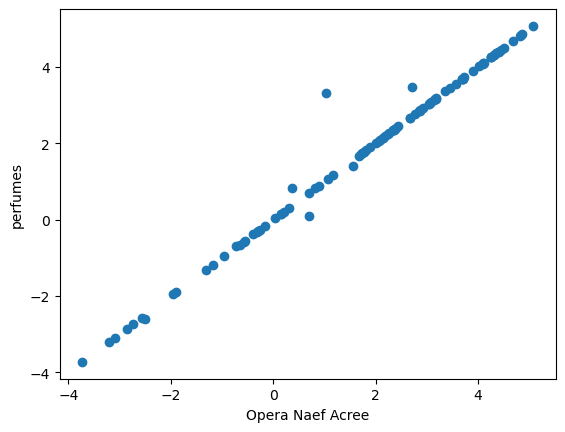

In [11]:
#for all molregnos, get val from datapoints and from all_molecules_298. plot against each other
import numpy as np
vp_vals_opera_naef_acree, vp_vals_perfumes = [],[]
for mrno in all_molecules_298['molregno']:
    if mrno is None:
        continue
    else:
        vp_vals_opera_naef_acree_all = datapoints[datapoints['molregno'] == mrno]['vp_log10_pa'].tolist()
        if len(vp_vals_opera_naef_acree_all) < 1:
            continue
        vp_vals_perfumes_all = all_molecules_298[all_molecules_298['molregno'] == mrno]['vp_log10_pa'].tolist()
        if len(vp_vals_perfumes_all) > 1:
            continue
            vp_vals_perfumes.append(np.mean(vp_vals_perfumes_all))
        else:
            vp_vals_perfumes.extend(vp_vals_perfumes_all)

        vp_vals_opera_naef_acree.extend(datapoints[datapoints['molregno'] == mrno]['vp_log10_pa'].tolist())
#print lens
print(len(vp_vals_opera_naef_acree), len(vp_vals_perfumes))
#plt    
import matplotlib.pyplot as plt
plt.scatter(vp_vals_opera_naef_acree, vp_vals_perfumes)
plt.xlabel('Opera Naef Acree')
plt.ylabel('perfumes')
plt.show()
#okay so pretty much all the same



In [16]:
molregnos = all_molecules_298['molregno'].tolist()
molregnos = [mrno for mrno in molregnos if mrno is not None]
molregnos = list(set(molregnos))
print(len(molregnos))


217


In [19]:
df_feats = pd.read_csv('data_curation/mols_mdfp_physchem_features.csv')
df_feats

,molregno,conf_id,vp_log10_pa,mdfp,molblock,ROMol,descriptors,mdfp_vec,NumHeavyAtoms,NumN,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,NumRotatableBonds
0,8,1151,-3.053298,"{'mdfp': '[13, 1, 0, 2, 0, 0, 0, 0, 0, 0, -97....",[H]OC(=O)c1c([H])c([H])c2c([H])c([H])c([H])c([...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61fef300>,"{'MaxAbsEStateIndex': 10.644614040060468, 'Max...","[13, 1, 0, 2, 0, 0, 0, 0, 0, 0, -97.7987770071...",13.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,9,1152,3.593202,"{'mdfp': '[5, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0.484...",[H]C([H])(Cl)OC([H])([H])Cl\n RDKit ...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61fef370>,"{'MaxAbsEStateIndex': 4.994984567901234, 'MaxE...","[5, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0.4848459757350...",5.0,0.0,...,0,0,0,0,0,0,0,0,0,2
2,11,1154,5.259101,"{'mdfp': '[4, 0, 0, 0, 1, 0, 0, 2, 0, 0, -0.10...",[H]C(F)(Cl)Cl\n RDKit 3D\n\n 0 ...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61fef290>,"{'MaxAbsEStateIndex': 10.530864197530864, 'Max...","[4, 0, 0, 0, 1, 0, 0, 2, 0, 0, -0.104781552046...",4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,12,1155,-3.104198,"{'mdfp': '[13, 3, 0, 3, 0, 0, 0, 1, 0, 0, -105...",[H]OC(=O)C([H])([H])Oc1c([H])c([H])c(Cl)c([H])...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61fef220>,"{'MaxAbsEStateIndex': 10.199797003163404, 'Max...","[13, 3, 0, 3, 0, 0, 0, 1, 0, 0, -105.003804343...",13.0,0.0,...,0,0,0,0,0,0,0,0,0,3
4,13,1156,3.664201,"{'mdfp': '[6, 2, 0, 0, 0, 0, 0, 0, 1, 0, -1.41...",[H]C([H])([H])C([H])(C([H])([H])[H])C([H])([H]...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61fef1b0>,"{'MaxAbsEStateIndex': 3.349930555555556, 'MaxE...","[6, 2, 0, 0, 0, 0, 0, 0, 1, 0, -1.410024750661...",6.0,0.0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3749,17247,1.036000,"{'mdfp': '[11, 1, 0, 1, 0, 0, 0, 0, 0, 0, -22....",[H]C([H])=C(C([H])([H])[H])[C@]1([H])C([H])([H...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61e4f7d0>,"{'MaxAbsEStateIndex': 11.199537037037036, 'Max...","[11, 1, 0, 1, 0, 0, 0, 0, 0, 0, -22.7079118557...",11.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3227,2545,17253,2.301000,"{'mdfp': '[4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5.357...",[H]/C(I)=C(\[H])I\n RDKit 3D\n\n ...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61e4f840>,"{'MaxAbsEStateIndex': 2.1633333333333336, 'Max...","[4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5.3572325631171...",4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3228,3394,17254,2.296000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.0...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61e4f8b0>,"{'MaxAbsEStateIndex': 9.177685185185185, 'MaxE...","[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.02947008199...",8.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3229,2680,17260,2.216000,"{'mdfp': '[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.1...",[H]O[C@]1([H])C([H])([H])C([H])([H])C([H])([H]...,<rdkit.Chem.rdchem.Mol object at 0x7f0d61e4f920>,"{'MaxAbsEStateIndex': 9.177685185185185, 'MaxE...","[8, 0, 0, 1, 0, 0, 0, 0, 0, 0, -24.16582824638...",8.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from rdkit.Chem import rdFingerprintGenerator

def get_fps(ms, generator=None):
    " generate fingerprints for a set of molecules "
    if generator is None:
        #generator = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=6)
        generator = rdFingerprintGenerator.GetMorganGenerator(radius=3)
    fps = [generator.GetFingerprint(x) for x in ms]
    return fps

In [27]:
df_feats['mol'] = [Chem.MolFromMolBlock(x) for x in df_feats['molblock']]
fps = get_fps(df_feats.mol)
df_feats['fps'] = fps

In [30]:
df_in_mrnos = df_feats[df_feats['molregno'].isin(molregnos)]
print(len(df_in_mrnos))
df_not_in_mrnos = df_feats[~df_feats['molregno'].isin(molregnos)]
print(len(df_not_in_mrnos))

157
3074


In [28]:
import bisect

import numpy as np
import pandas as pd
from rdkit import Chem
import pandas as pd
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
import random
from sklearn.model_selection import train_test_split
def get_distance_cdf(fps1,
                     fps2,
                     removeSelf=False,
                     vals=np.arange(0, 1.01, 0.01)):
    ' finds the CDF for the closest member of fps2 to each element of fps1 '
    nbrds = []
    for i, fp in enumerate(fps1):
        ds = DataStructs.BulkTanimotoSimilarity(fp, fps2, returnDistance=1)
        if removeSelf:
            ds.pop(i)
        nbrds.append(min(ds))
    nPts = len(nbrds)
    nbrds = np.array(nbrds)
    res = []
    for v in vals:
        res.append(np.sum(nbrds <= v) / nPts)
    return res
def get_dissim_cdf(fps1,
                   fps2,
                   frac=0.2,
                   removeSelf=False,
                   vals=np.arange(0, 1.01, 0.01)):
    ' finds the CDF for the X percentile most-distant member of fps2 to each element of fps1 '
    nbrds = []
    refPos = int(frac * len(fps2))
    for i, fp in enumerate(fps1):
        ds = DataStructs.BulkTanimotoSimilarity(fp, fps2, returnDistance=1)
        if removeSelf:
            ds.pop(i)
        ds = sorted(ds)
        nbrds.append(ds[refPos])
    nPts = len(nbrds)
    nbrds = np.array(nbrds)
    res = []
    for v in vals:
        res.append(np.sum(nbrds <= v) / nPts)
    return res
def get_randomdist_cdf(fps1,
                       fps2,
                       distThresh=0.8,
                       removeSelf=False,
                       vals=np.arange(0, 1.01, 0.01)):
    ''' CDF of number of points in fps2 which are greater than distThresh 
      from each point in fps1 
    '''
    nbrds = []
    nfps2 = len(fps2)
    for i, fp in enumerate(fps1):
        ds = DataStructs.BulkTanimotoSimilarity(fp, fps2, returnDistance=1)
        if removeSelf:
            ds.pop(i)
        ds = sorted(ds)
        pos = bisect.bisect_left(ds, distThresh)
        nbrds.append((nfps2 - pos) / nfps2)
        nPts = len(nbrds)
    nbrds = np.array(nbrds)
    res = []
    for v in vals:
        res.append(np.sum(nbrds <= v) / nPts)
    return res

def get_relateddist_cdf(fps1,
                        fps2,
                        distThresh=0.65,
                        removeSelf=False,
                        vals=np.arange(0, 1.01, 0.01)):
    ''' CDF of number of points in fps2 which are less than distThresh 
      from each point in fps1 
    '''
    nbrds = []
    nfps2 = len(fps2)
    for i, fp in enumerate(fps1):
        ds = DataStructs.BulkTanimotoSimilarity(fp, fps2, returnDistance=1)
        if removeSelf:
            ds.pop(i)
        ds = sorted(ds)
        nbrds.append(bisect.bisect_left(ds, distThresh) / nfps2)
    nPts = len(nbrds)
    nbrds = np.array(nbrds)
    res = []
    for v in vals:
        res.append(np.sum(nbrds <= v) / nPts)

    return res

def modified_spatial_stats(testfps,
                           trainfps,
                           vals=np.arange(0, 1.01, 0.01)):
    ' calculates F using closest member of train to test instead of vice-versa '
    g_vals = get_distance_cdf(testfps, testfps, removeSelf=True, vals=vals)
    tfps = trainfps
    bootstrap = [
        tfps[x]
        for x in [random.randint(0,
                                 len(tfps) - 1) for x in range(len(tfps))]
    ]
    f_vals = get_distance_cdf(testfps, bootstrap, vals=vals)
    s_vals = [f - g for f, g in zip(f_vals, g_vals)]
    return vals, g_vals, f_vals, s_vals

In [32]:
vals_lao, g_vals_lao, f_vals_lao, s_vals_lao = modified_spatial_stats(df_in_mrnos['fps'].tolist(), df_not_in_mrnos['fps'].tolist())
#print sums
print(sum(g_vals_lao), sum(f_vals_lao), sum(s_vals_lao))

56.05095541401275 63.509554140127406 7.458598726114653


In [2]:
#mdfptools
from Parameteriser import LiquidParameteriser
from Simulator import LiquidSimulator
from Composer import LiquidComposer

#rdkit
from rdkit import Chem
from rdkit.Chem import rdmolops
from rdkit.Chem.rdmolfiles import MolFromMolFile

#database
import psycopg2
import uuid
import json

#other
import mdtraj as md
import pickle
import sys

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************

